In [1]:
import numpy as np
import numba as nb
import math
import matplotlib.pyplot as plt
import pandas as pd
import time
from numba import jit, njit, types, vectorize, prange
from numba import jitclass, int32, float32, int64, float64
from multiprocessing import Pool
from os import listdir
from os.path import isfile, join

# GROUND TRUTH DATA

In [2]:
gt = {}
i = 1
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data0.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data0.csv')['v'].values)
i = 2
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data1.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data1.csv')['v'].values)
i = 3
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data2.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data2.csv')['v'].values)
i = 4
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data4.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data4.csv')['v'].values)
i = 5
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data5.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data5.csv')['v'].values)
i = 6
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data6.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data6.csv')['v'].values)
i = 7
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data8.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data8.csv')['v'].values)
i = 8
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data9.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data9.csv')['v'].values)
i = 9
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data10.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data10.csv')['v'].values)
i = 10
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/data11.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/data11.csv')['v'].values)
i = 11
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/exp-data3.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/exp-data3.csv')['v'].values)
i = 12
gt[i] = {}
gt[i]['t'] = np.array(pd.read_csv('post_processing_data/exp-data7.csv')['t'].values)
gt[i]['v'] = np.array(pd.read_csv('post_processing_data/exp-data7.csv')['v'].values)

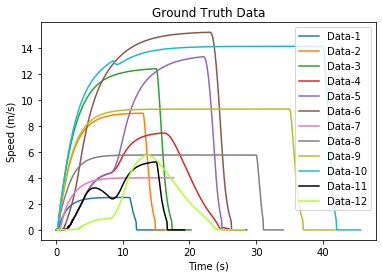

In [3]:
plt.clf()
for i in range(1,13):
    if i== 11:
        plt.plot(gt[i]['t'], gt[i]['v'], label='Data-{}'.format(i), color='black')
    elif i == 12:
        
        plt.plot(gt[i]['t'], gt[i]['v'], label='Data-{}'.format(i), color='greenyellow')
    else:
        plt.plot(gt[i]['t'], gt[i]['v'], label='Data-{}'.format(i))
plt.legend()
plt.title('Ground Truth Data')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.savefig('results/ground_truth', dpi=600)

# PREPROCESSING

In [4]:
path = 'post_processing_data'
files = [x for x in listdir(path) if isfile(join(path, x))]
df = {}
for x in files:
    df[x] = pd.read_csv(path + '/' + x)

In [5]:
i = 0
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t0 = np.array(df[x].t).astype('float64')
u0 = np.array([throttle, brake]).T.astype('float64')
v0 = np.array(df[x].v).astype('float64')

i = 1
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t1 = np.array(df[x].t).astype('float64')
u1 = np.array([throttle, brake]).T.astype('float64')
v1 = np.array(df[x].v).astype('float64')

i = 2
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t2 = np.array(df[x].t).astype('float64')
u2 = np.array([throttle, brake]).T.astype('float64')
v2 = np.array(df[x].v).astype('float64')

i = 3
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t3 = np.array(df[x].t).astype('float64')
u3 = np.array([throttle, brake]).T.astype('float64')
v3 = np.array(df[x].v).astype('float64')

i = 4
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t4 = np.array(df[x].t).astype('float64')
u4 = np.array([throttle, brake]).T.astype('float64')
v4 = np.array(df[x].v).astype('float64')

i = 5
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t5 = np.array(df[x].t).astype('float64')
u5 = np.array([throttle, brake]).T.astype('float64')
v5 = np.array(df[x].v).astype('float64')

i = 6
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t6 = np.array(df[x].t).astype('float64')
u6 = np.array([throttle, brake]).T.astype('float64')
v6 = np.array(df[x].v).astype('float64')

i = 7
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t7 = np.array(df[x].t).astype('float64')
u7 = np.array([throttle, brake]).T.astype('float64')
v7 = np.array(df[x].v).astype('float64')

i = 8
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t8 = np.array(df[x].t).astype('float64')
u8 = np.array([throttle, brake]).T.astype('float64')
v8 = np.array(df[x].v).astype('float64')

i = 9
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t9 = np.array(df[x].t).astype('float64')
u9 = np.array([throttle, brake]).T.astype('float64')
v9 = np.array(df[x].v).astype('float64')

i = 10
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t10 = np.array(df[x].t).astype('float64')
u10 = np.array([throttle, brake]).T.astype('float64')
v10 = np.array(df[x].v).astype('float64')

i = 11
x = files[i]
throttle = df[x].throttle
brake = df[x].brake
t11 = np.array(df[x].t).astype('float64')
u11 = np.array([throttle, brake]).T.astype('float64')
v11 = np.array(df[x].v).astype('float64')

In [6]:
# KALAU ERROR, BERARTI ADA YANG BELUM BENER
_ = t0 + u0[:,0] + v0
_ = t1 + u1[:,0] + v1
_ = t2 + u2[:,0] + v2
_ = t3 + u3[:,0] + v3
_ = t4 + u4[:,0] + v4
_ = t5 + u5[:,0] + v5
_ = t6 + u6[:,0] + v6
_ = t7 + u7[:,0] + v7
_ = t8 + u8[:,0] + v8
_ = t9 + u9[:,0] + v9
_ = t10 + u10[:,0] + v10
_ = t11 + u11[:,0] + v11

# MAKE FUNCTION

## Generate population

In [7]:
def generate_population(num, dim, rng):
    """
    Generate flowers:
        Input:
            num: number of flowers (integer)
            dim: number of parameters (integer)
            rng: range number used in initialization (list or numpy array)
        Output:
            flws: initial position of the flowers (numpy array)
    """
    flws = np.zeros((num,dim))
    for i in range(dim):
        lim = rng[i]
        flws[:, i] = np.random.uniform(lim[0], lim[1], size=num)
    return flws

## Constraint

In [8]:
@njit
def admissible(param):
    a1, a2, a3, b1, b2, b3, b4, c1, c2, c3, c4, td11, td12, td13, td21, td22, td23 = param
    if a1 > 0. or a2 > 0. or a3 > 0. or b1 < 0. or b2 < 0. or c1 > 0. or c2 > 0. or np.around(td11)<0 or np.around(td12)<0 or np.around(td13)<0 or np.around(td21)<0 or np.around(td22)<0 or np.around(td23)<0:
        return False
    else:
        return True
    
_ = admissible(np.random.randn(17))

## Forward propagation

In [10]:
@njit
def delayed_control_signal(i, u, u_list, td):
    if i < td:
        ut = 0.0
    else:
        if td == 0:
            ut = u
        else:
            ut = u_list[i-td]
    return ut
_ = delayed_control_signal(1, 0.1, np.array([0.1, 0.2]), 0)

In [11]:
@njit
def forward_propagation(t, u, param):
    a1, a2, a3, b1, b2, b3, b4, c1, c2, c3, c4, td11, td12, td13, td21, td22, td23 = param
    td11 = int(np.around(td11))
    td12 = int(np.around(td12))
    td13 = int(np.around(td13))
    td21 = int(np.around(td21))
    td22 = int(np.around(td22))
    td23 = int(np.around(td23))

    u1_list = np.empty(t.shape)
    u2_list = np.empty(t.shape)
    out = np.empty(t.shape)
    y = 0.0
    for i in range(t.shape[0]):
        if i == 0:
            dt = t[1] - t[0]
        else:
            dt = t[i] - t[i-1]
            
        u1, u2 = u[i]        
        u11t = delayed_control_signal(i, u1, u1_list, td11)
        u12t = delayed_control_signal(i, u1, u1_list, td12)
        u13t = delayed_control_signal(i, u1, u1_list, td13)
        u21t = delayed_control_signal(i, u2, u2_list, td21)
        u22t = delayed_control_signal(i, u2, u2_list, td22)
        u23t = delayed_control_signal(i, u2, u2_list, td23)
        
        temp = 0.
        if y != 0.:
            temp = a1
                    
        y_dot = temp + a2 * y + a3 * y**2 \
                + b1 * u11t + b2 * np.exp(b3 * y + b4 * u12t) * u13t  \
                + c1 * u21t + c2 * np.exp(c3 * y + c4 * u22t) * u23t
        
        y += y_dot * dt
        if y < 0.0:
            y = 0.0

        u1_list[i] = u1
        u2_list[i] = u2
        out[i] = y

    return out
_ = forward_propagation(np.arange(10, dtype=float), np.random.randn(10,2), np.ones(17))

## Cost and metric

In [12]:
@njit
def cost(t, u, v, param):
    error = v - forward_propagation(t, u, param)
    cost = np.dot(error.T, error)
    return cost
_ = cost(np.arange(10, dtype=float), np.random.randn(10,2), np.random.randn(10), np.ones(17))

@njit
def accuracy(t, u, v, param):
    error = v - forward_propagation(t, u, param)
    numerator = np.linalg.norm(error)
    denumerator = np.linalg.norm(v - np.mean(v))
    acc = 1.0 - numerator / denumerator
    return acc
_ = accuracy(np.arange(10, dtype=float), np.random.randn(10,2), np.random.randn(10), np.ones(17))

@njit
def mean_absolute_error(t, u, v, param):
    error = v - forward_propagation(t, u, param)
    out = np.mean(np.abs(error))
    return out
_ = mean_absolute_error(np.arange(10, dtype=float), np.random.randn(10,2), np.random.randn(10), np.ones(17))

@njit
def mean_squared_error(t, u, v, param):
    error = v - forward_propagation(t, u, param)
    out = np.mean(error**2)
    return out
_ = mean_squared_error(np.arange(10, dtype=float), np.random.randn(10,2), np.random.randn(10), np.ones(17))

@njit
def maximum_absolute_error(t, u, v, param):
    error = v - forward_propagation(t, u, param)
    out = np.max(np.abs(error))
    return out
_ = maximum_absolute_error(np.arange(10, dtype=float), np.random.randn(10,2), np.random.randn(10), np.ones(17))

In [13]:
@njit
def calculate_total_cost(param):
    loss = np.Inf
    if admissible(param):
        loss = 0.
        m = 0.
        
        loss += cost(t0, u0, v0, param)
        loss += cost(t1, u1, v1, param)
        loss += cost(t2, u2, v2, param)
        loss += cost(t3, u3, v3, param)
        loss += cost(t4, u4, v4, param)
        loss += cost(t5, u5, v5, param)
        loss += cost(t6, u6, v6, param)
        loss += cost(t7, u7, v7, param)
        loss += cost(t8, u8, v8, param)
        loss += cost(t9, u9, v9, param)
        loss += cost(t10, u10, v10, param)
        loss += cost(t11, u11, v11, param)
                
        m += t0.shape[0]
        m += t1.shape[0]
        m += t2.shape[0]
        m += t3.shape[0]
        m += t4.shape[0]
        m += t5.shape[0]
        m += t6.shape[0]
        m += t7.shape[0]
        m += t8.shape[0]
        m += t9.shape[0]
        m += t10.shape[0]
        m += t11.shape[0]
        
        loss = loss / m
        
    return loss
_ = calculate_total_cost(np.ones(17))

In [14]:
@njit(parallel=True)
def flowers_cost(flowers):
    length = flowers.shape[0]
    losses = np.empty(length)
    for ii in prange(length):
        losses[ii] = calculate_total_cost(flowers[ii])
    return losses
_ = flowers_cost(np.ones((2,17)))

## Pollination

In [15]:
@njit(parallel = True)
def fpa(flowers, loss_flowers, global_, global_loss_, p, alpha, gamma, var, s0):
    num = flowers.shape[0]
    dim = flowers.shape[1]    
    out = np.empty(flowers.shape)
    temp = np.empty(dim)
    loss = np.empty(loss_flowers.shape)
    temp_loss = 0.
    random_number = np.random.uniform(0., 1., num)
    for i in prange(num):
        # GLOBAL POLLINATION
        if random_number[i] < p:
            # Generate Levy Flight
            upper = np.random.normal(0., np.sqrt(var), size=dim)
            lower = np.abs(np.random.normal(0., 1., size=dim))**(1./alpha)
            L = np.divide(upper, lower)
            
            for j in range(L.shape[0]):
                if L[j] < s0:
                    L[j] = s0
            
            temp = flowers[i] + gamma * L * (global_ - flowers[i])
        # LOCAL POLLINATION
        else:
            while(True):
                i1, i2 = np.random.randint(0, num, size=2)
                if i1==i2 or i1==i or i2==i:
                    if num <= 5: # For breaking the loop
                        None
                    else:
                        continue
                break
            epsilon = np.random.uniform(0.,1.)
            
            temp = flowers[i] + epsilon * (flowers[i1] - flowers[i2])
        
        # CALCULATE COST
        temp_loss = calculate_total_cost(temp)
        if np.isnan(temp_loss):
            temp_loss = np.Inf
        
        # UPDATE
        if temp_loss < loss_flowers[i]:
            out[i] = temp
            loss[i] = temp_loss
        else:
            out[i] = flowers[i]
            loss[i] = loss_flowers[i]
    
    min_idx = np.argmin(loss)
    min_loss = loss[min_idx]
    if global_loss_ > min_loss:
        global_loss_new = min_loss
        global_new = out[min_idx, :]
    else:
        global_new = global_
        global_loss_new = global_loss_
    
    return out, loss, global_new, global_loss_new

xx1 = np.ones((2, 17))
xx2 = np.ones(2)
xx3 = np.random.randn(17)
_ = fpa(xx1, xx2, xx3, 100.0, 0.8, 1.5, 0.1, 0.69, 0.1)

# SIMULATION (OPTIMIZATION)

In [16]:
num = 50

r_a1 = [0., -2.]
r_a2 = [0., -2.]
r_a3 = [0., -2.]
r_b1 = [0., 2.]
r_b2 = [0., 2.]
r_b3 = [-2., 2.]
r_b4 = [-2., 2.]
r_c1 = [0., -2.]
r_c2 = [0., -2.]
r_c3 = [-2., 2.]
r_c4 = [-2., 2.]
r_td11 = [5, 25]
r_td12 = [5, 25]
r_td13 = [5, 25]
r_td21 = [0, 10]
r_td22 = [0, 10]
r_td23 = [0, 10]
rng = [r_a1, r_a2, r_a3,
       r_b1, r_b2, r_b3, r_b4,
       r_c1, r_c2, r_c3, r_c4,
       r_td11, r_td12, r_td13,
       r_td21, r_td22, r_td23
      ]
dim = len(rng)

s0 = 0.1
p_threshold = 0.8
alpha = 1.5
gamma = 0.1
var = (math.gamma(1+alpha)/alpha/math.gamma((1+alpha)/2) * np.sin(np.pi * alpha/2)/2**((alpha-1)/2))**(1/alpha)

In [14]:
start_time = time.clock()

flowers = generate_population(num, dim, rng)
global_ = None
global_loss_ = np.Inf

loss_flowers = flowers_cost(flowers)
loss_flowers[np.isnan(loss_flowers)] = np.Inf
min_idx = np.argmin(loss_flowers)
min_loss = loss_flowers[min_idx]
if global_loss_ > min_loss:
    global_loss_ = min_loss
    global_ = flowers[min_idx, :]

# Limiting Levy Flight s0 = 0.1
total_itr = 10000
global_history = np.empty((total_itr, dim))
global_history[0] = global_
global_loss_history = np.empty(total_itr)
global_loss_history[0] = global_loss_
for i in range(1, total_itr):
    # Flower Pollination Algorithm
    flowers, loss_flowers, global_, global_loss_ = fpa(flowers, loss_flowers, global_, global_loss_, p_threshold, alpha, gamma, var, s0)
    
    print('iteration: {} || global_loss: {:.5f}'.format(i, global_loss_))
     
    global_history[i] = global_
    global_loss_history[i] = global_loss_

end_time = time.clock()

C:\Users\lenovo\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


iteration: 1 || global_loss: 37.91979
iteration: 2 || global_loss: 37.91979
iteration: 3 || global_loss: 37.91979
iteration: 4 || global_loss: 36.09611
iteration: 5 || global_loss: 33.02222
iteration: 6 || global_loss: 33.02222
iteration: 7 || global_loss: 31.18159
iteration: 8 || global_loss: 31.18159
iteration: 9 || global_loss: 30.34328
iteration: 10 || global_loss: 18.75047
iteration: 11 || global_loss: 18.75047
iteration: 12 || global_loss: 10.41426
iteration: 13 || global_loss: 10.41426
iteration: 14 || global_loss: 6.49573
iteration: 15 || global_loss: 6.49573
iteration: 16 || global_loss: 6.49573
iteration: 17 || global_loss: 6.49573
iteration: 18 || global_loss: 6.49573
iteration: 19 || global_loss: 4.03144
iteration: 20 || global_loss: 4.03144
iteration: 21 || global_loss: 4.03144
iteration: 22 || global_loss: 4.03144
iteration: 23 || global_loss: 4.03144
iteration: 24 || global_loss: 4.03144
iteration: 25 || global_loss: 4.03144
iteration: 26 || global_loss: 4.03144
iteratio

C:\Users\lenovo\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [ ]:
# Save the simulation
'''
np.save('global_history.npy', global_history)
np.save('global_loss_history.npy', global_loss_history)
'''

In [15]:
print('Simulation time: {}'.format(end_time - start_time))
print('The minimum loss: {}'.format(global_loss_))
print('Parameters: ')
print(global_)

Simulation time: 959.1390999820001
The minimum loss: 0.009335816708737843
Parameters: 
[-9.32977948e-01 -8.76899268e-01 -3.81319388e-06  2.33466279e+00
  5.20318838e+00  5.56628511e-02  2.09908015e-01 -5.62895447e-01
 -1.38426110e+01 -2.04113361e-01 -6.71627133e-01  8.60289954e-02
  1.36439056e+02  3.02852036e+01  8.87338285e+01  4.19427450e+01
 -3.10163967e-01]


In [14]:
print(global_)

[-9.32977948e-01 -8.76899268e-01 -3.81319388e-06  2.33466279e+00
  5.20318838e+00  5.56628511e-02  2.09908015e-01 -5.62895447e-01
 -1.38426110e+01 -2.04113361e-01 -6.71627133e-01  8.60289954e-02
  1.36439056e+02  3.02852036e+01  8.87338285e+01  4.19427450e+01
 -3.10163967e-01]


# RESULT

## Load Model

In [17]:
# Perhatikan directorynya
global_history = np.load('results/global_history.npy') # Perhatikan directory nya
global_loss_history = np.load('results/global_loss_history.npy') # Perhatikan directory nya
global_ = global_history[-1]
global_loss_ = global_loss_history[-1]

In [18]:
param_name = ['a1', 'a2', 'a3', 'b1', 'b2', 'b3', 'b4', 'c1', 'c2', 'c3', 'c4', 'd11', 'd12', 'd13', 'd21', 'd22', 'd23']
print('The minimum loss: {}'.format(global_loss_))
print('Parameters:')
for i in range(len(param_name)):
    print('{}: {}'.format(param_name[i], global_[i]))

The minimum loss: 0.009335816708737843
Parameters:
a1: -0.932977948449612
a2: -0.8768992676064652
a3: -3.8131938805134536e-06
b1: 2.3346627915873586
b2: 5.203188381213886
b3: 0.05566285105151837
b4: 0.20990801535027429
c1: -0.5628954470469816
c2: -13.842610975471302
c3: -0.20411336134481003
c4: -0.6716271325263895
d11: 0.08602899537038236
d12: 136.43905581379232
d13: 30.285203568861174
d21: 88.73382846850785
d22: 41.94274502169355
d23: -0.3101639673813364


## Visualization

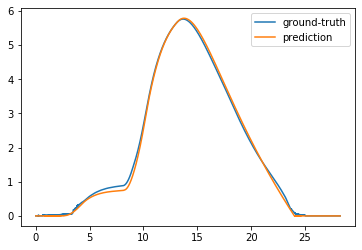

In [19]:
# Visualization
t = t11
u = u11
v = v11
test = forward_propagation(t, u, global_)
plt.plot(t, v, label='ground-truth')
plt.plot(t, test, label='prediction')
plt.legend()
plt.show()

## Cost and Metrics

In [20]:
t = [t0, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11]
u = [u0, u1, u2, u3, u4, u5, u6, u7, u8, u9, u10, u11]
v = [v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11]
acc = []
mse = []
maae = [] 
for i in range(len(t)):
    acc.append(accuracy(t[i], u[i], v[i], global_))
    mse.append(mean_squared_error(t[i], u[i], v[i], global_))
    maae.append(maximum_absolute_error(t[i], u[i], v[i], global_))

In [21]:
print('Accuracy')
for i in range(len(t)):
    print('Data ke-{}: {:.2f}%'.format(i+1, acc[i]*100))

Accuracy
Data ke-1: 92.77%
Data ke-2: 98.16%
Data ke-3: 98.41%
Data ke-4: 97.08%
Data ke-5: 97.99%
Data ke-6: 96.77%
Data ke-7: 97.88%
Data ke-8: 98.46%
Data ke-9: 81.15%
Data ke-10: 98.11%
Data ke-11: 95.16%
Data ke-12: 95.88%


In [22]:
print('Mean Squared Error')
for i in range(len(t)):
    print('Data ke-{}: {:.5f}'.format(i+1, mse[i]))

Mean Squared Error
Data ke-1: 0.00591
Data ke-2: 0.00408
Data ke-3: 0.00274
Data ke-4: 0.01719
Data ke-5: 0.00907
Data ke-6: 0.00772
Data ke-7: 0.01182
Data ke-8: 0.00751
Data ke-9: 0.03639
Data ke-10: 0.00125
Data ke-11: 0.00780
Data ke-12: 0.00677


In [23]:
print('Maximum Absolute Squared Error')
for i in range(len(t)):
    print('Data ke-{}: {:.3f}'.format(i+1, maae[i]))

Maximum Absolute Squared Error
Data ke-1: 0.283
Data ke-2: 0.372
Data ke-3: 0.357
Data ke-4: 0.692
Data ke-5: 0.480
Data ke-6: 0.180
Data ke-7: 0.364
Data ke-8: 0.302
Data ke-9: 0.698
Data ke-10: 0.279
Data ke-11: 0.343
Data ke-12: 0.220


In [24]:
num = 0
for i in range(len(t)):
    num += t[i].shape[0]
vv = np.empty(num)
vv_gt = np.empty(num)
nn = 0
for i in range(len(t)):
    n = t[i].shape[0]
    if nn == 0:
        vv[:n] = forward_propagation(t[i], u[i], global_)
        vv_gt[:n] = v[i]
    else:
        vv[nn:nn+n] = forward_propagation(t[i], u[i], global_)
        vv_gt[nn:nn+n] = v[i]
    nn += n
total_accuracy = (1 - np.linalg.norm(vv_gt - vv)/np.linalg.norm(vv_gt - np.mean(vv_gt)))
print('Total Accuracy: {:.2f}%'.format(total_accuracy*100))

Total Accuracy: 98.01%


# TEST MODEL

In [25]:
df = pd.read_csv('test_data.csv')
throttle = df.throttle
brake = df.brake
t99 = np.array(df.time).astype('float64')
u99 = np.array([throttle, brake]).T.astype('float64')
v99 = np.array(df.speed).astype('float64')

In [26]:
vp = forward_propagation(t99, u99, global_)
print('accuracy: {:.2f}%'.format(100*accuracy(t99, u99, v99, global_)))
print('mean_squared_error: {:.5f}'.format(mean_squared_error(t99, u99, v99, global_)))
print('max_absolute_error: {:.3f}'.format(maximum_absolute_error(t99, u99, v99, global_)))

accuracy: 96.88%
mean_squared_error: 0.00915
max_absolute_error: 0.527


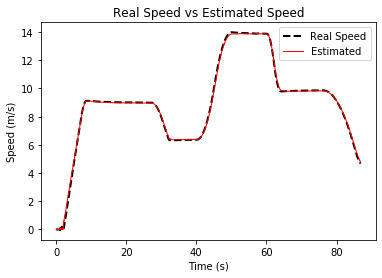

In [27]:
plt.plot(t99, v99, label='Real Speed', linestyle='--', color='black', linewidth=2)
plt.plot(t99, vp, label='Estimated', linewidth=1, color='red')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Real Speed vs Estimated Speed')
plt.savefig('results/real_estimated', dpi=600)
plt.show()

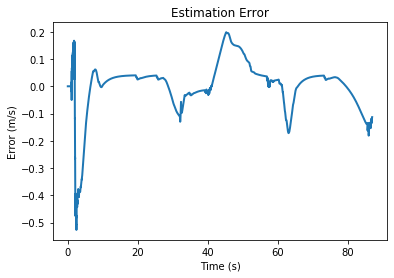

In [28]:
plt.plot(t99, v99-vp, linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Error (m/s)')
plt.title('Estimation Error')
plt.savefig('results/estimation_error', dpi=600)
plt.show()

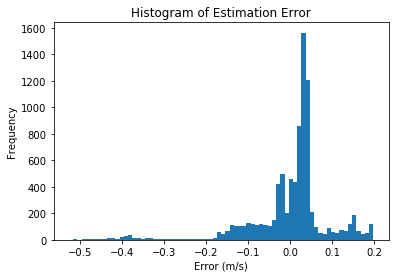

In [56]:
err = v99 - vp
plt.hist(v99-vp, bins=int((np.max(err) - np.min(err))/0.01))
plt.title('Histogram of Estimation Error')
plt.xlabel('Error (m/s)')
plt.ylabel('Frequency')
plt.savefig('results/estimation_error_hist', dpi=600)
plt.show()

## Dari Data CARLA dengan PID

In [44]:
df = pd.read_csv('test_data_pid.csv')
throttle = df.throttle
brake = df.brake
mt0 = np.array(df.time).astype('float64')
mu0 = np.array([throttle, brake]).T.astype('float64')
mv0 = np.array(df.speed).astype('float64')

In [87]:
global_ = global_history[-1]
vp0 = forward_propagation(mt0, mu0, global_)
print('accuracy: {:.2f}%'.format(100*accuracy(mt0, mu0, mv0, global_)))
print('mean_squared_error: {:.5f}'.format(mean_squared_error(mt0, mu0, mv0, global_)))
print('max_absolute_error: {:.3f}'.format(maximum_absolute_error(mt0, mu0, mv0, global_)))

accuracy: 93.08%
mean_squared_error: 0.07485
max_absolute_error: 0.826


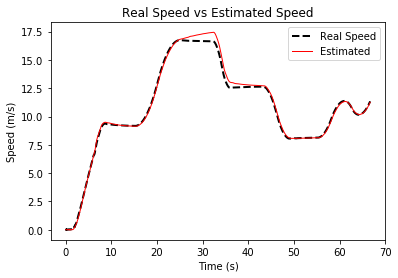

In [88]:
plt.plot(mt0, mv0, label='Real Speed', linestyle='--', color='black', linewidth=2)
plt.plot(mt0, vp0, label='Estimated', linewidth=1, color='red')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Real Speed vs Estimated Speed')
plt.savefig('results/real_estimated_II', dpi=600)
plt.show()

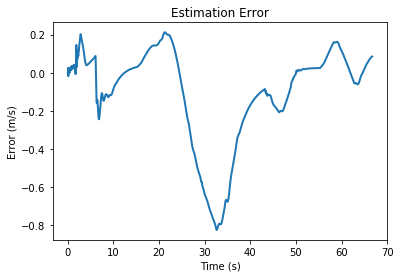

In [47]:
plt.plot(mt0, mv0-vp0, linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Error (m/s)')
plt.title('Estimation Error')
plt.savefig('results/estimation_error_II', dpi=600)
plt.show()

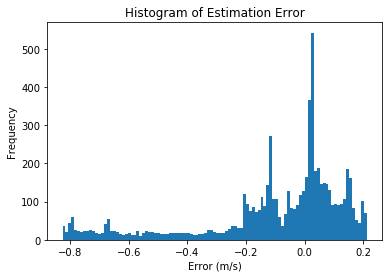

In [57]:
err = mv0-vp0
plt.hist(mv0-vp0, bins=int((np.max(err) - np.min(err))/0.01))
plt.title('Histogram of Estimation Error')
plt.xlabel('Error (m/s)')
plt.ylabel('Frequency')
plt.savefig('results/estimation_error_hist_II', dpi=600)
plt.show()